In [1]:
import numpy as np
import biom
import pandas as pd
import random
import matplotlib.pyplot as plt
from biom.util import biom_open
from sklearn.preprocessing import scale
%matplotlib inline


### load and preprocess data

In [2]:
# load data
misame_mf = pd.read_csv('CTF_sample_metadata.tsv', sep='\t', index_col=0)
misame_table = biom.load_table('Misame_raw2.hd5.biom')
misame_df = misame_table.to_dataframe()
misame_array = misame_df.values

In [3]:
display(misame_mf.head())
misame_table

,SubjectID,VISIT,Timepoint,AGEDAYS,COUNTRY,STUDYID,SITEID,CITYTOWN,SUBJID,STUDYTYP,...,WAZ_M04_bins,HAZ_M04_bins,WAZ_M06_bins,HAZ_M06_bins,MBMI_AC4_bins,MBMI_M01_bins,MBMI_M04_bins,MHGB_AC3_bins,MHGB_Enroll_bins,SICK_M0_to_4
SampleID,,,,,,,,,,,,,,,,,,,,,
1421_611,15,BM Collection 14-21D,1,20,BURKINA FASO,MISAME-3,6,Hounde District,15,1,...,0 to 1,below -1,0 to 1,-1 to 0,18.5-25,18.5-25,18.5-25,10.5-11.5,<=10.5,False
pn12_611,15,BM Collection 1M-2M,2,67,BURKINA FASO,MISAME-3,6,Hounde District,15,1,...,0 to 1,below -1,0 to 1,-1 to 0,18.5-25,18.5-25,18.5-25,10.5-11.5,<=10.5,False
pn34_611,15,BM Collection 3M-4M,3,125,BURKINA FASO,MISAME-3,6,Hounde District,15,1,...,0 to 1,below -1,0 to 1,-1 to 0,18.5-25,18.5-25,18.5-25,10.5-11.5,<=10.5,False
1421_229,57,BM Collection 14-21D,1,31,BURKINA FASO,MISAME-3,2,Hounde District,57,1,...,below -1,-1 to 0,below -1,-1 to 0,18.5-25,18.5-25,18.5-25,10.5-11.5,11.5-12.5,False
pn12_229,57,BM Collection 1M-2M,2,62,BURKINA FASO,MISAME-3,2,Hounde District,57,1,...,below -1,-1 to 0,below -1,-1 to 0,18.5-25,18.5-25,18.5-25,10.5-11.5,11.5-12.5,False


37071 x 839 <class 'biom.table.Table'> with 30522605 nonzero entries (98% dense)

In [4]:
misame_table.to_dataframe().head()

,1421_101,1421_102,1421_103,1421_104,1421_106,1421_107,1421_108,1421_109,1421_111,1421_112,...,pn34_653,pn34_654,pn34_657,pn34_658,pn34_659,pn34_660,pn34_661,pn34_662,pn34_663,pn34_664
rLC_pos_mtb_4846337,614.0,384.0,319.0,294.0,251.0,314.0,250.0,404.0,298.0,293.0,...,271.0,283.0,395.0,386.0,403.0,352.0,303.0,210.0,243.0,196.0
rLC_pos_mtb_8977937,86.0,113.0,51.0,69.0,60.0,104.0,85.0,73.0,45.0,49.0,...,70.0,104.0,49.0,120.0,58.0,102.0,63.0,65.0,37.0,49.0
rLC_pos_mtb_6168557,586.0,319.0,445.0,263.0,278.0,464.0,228.0,243.0,400.0,637.0,...,461.0,225.0,358.0,288.0,280.0,222.0,347.0,424.0,379.0,331.0
rLC_pos_mtb_1208721,50.0,24.0,212.0,117.0,313.0,52.0,45.0,88.0,133.0,236.0,...,120.0,456.0,43.0,514.0,261.0,354.0,79.0,403.0,485.0,485.0
rLC_pos_mtb_9938192,635.0,431.0,395.0,568.0,465.0,535.0,398.0,438.0,361.0,447.0,...,510.0,369.0,672.0,356.0,448.0,600.0,562.0,458.0,432.0,491.0


In [5]:
#step 1: imputation
random.seed(5)
#draw from unif distribution with low=min(table)/10 and high=min(table)
zero_len = len(misame_array[misame_array==0])
min_value = misame_table.min().min()
rand_array = np.random.uniform(low=min_value/10, high=min_value, size=zero_len)
misame_array[misame_array==0] = rand_array
#sanity check
print(rand_array.min())
print(misame_array.min())

0.10000354421255025
0.10000354421255025


In [6]:
#step 2: log10 transform the data
misame_array = np.log10(misame_array)
#step 3: scale the data col-wise (sample-level)
misame_array = scale(misame_array, axis=0)

In [7]:
#step 4: turn back into biom table
table_transformed = biom.Table(misame_array, 
                               misame_df.index, 
                               misame_df.columns)
#save
with biom_open('./Misame_transformed.biom', 'w') as f:  
    table_transformed.to_hdf5(f, 'sapient-norm')

### TEMPTED

In [8]:
from gemelli.tempted import tempted_factorize
from gemelli.preprocessing import clr_transformation

In [12]:
tempted_res = tempted_factorize(table=table_transformed, 
                                sample_metadata=misame_mf,
                                individual_id_column='SubjectID', 
                                state_column='Timepoint')

Prop explained: [0.07711738 0.0530445  0.04428835]
Prop explained argsort: [0 1 2]
Eigenvalues pre-sorting: [1534.593038   1657.56809002 1459.09001932]
Eigenvalues post-sorting: [1534.593038   1657.56809002 1459.09001932]


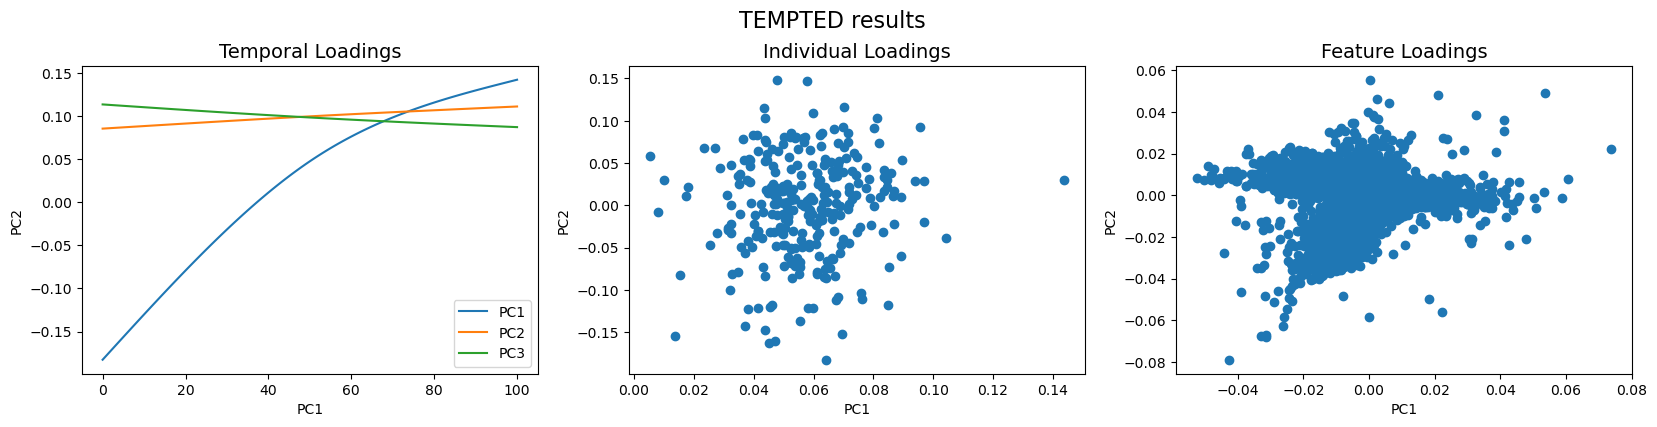

In [17]:
#feature loadings
comp1 = 'PC1'
comp2 = 'PC2'

fig, axn = plt.subplots(1, 3, figsize=(20, 4), sharey=False)
axn[0].plot(tempted_res[1][['PC1', 'PC2', 'PC3']])
axn[0].set_title('Temporal Loadings', fontsize=14)
axn[0].legend(['PC1', 'PC2', 'PC3'])
axn[1].scatter(tempted_res[0].samples[comp1],
               tempted_res[0].samples[comp2])
axn[1].set_title('Individual Loadings', fontsize=14)
axn[2].scatter(tempted_res[0].features[comp1],
               tempted_res[0].features[comp2])
axn[2].set_title('Feature Loadings', fontsize=14)
plt.suptitle('TEMPTED results', fontsize=16, y=1.02)
plt.setp(axn, xlabel=comp1.replace('_', ' '), 
         ylabel=comp2.replace('_', ' '))
plt.show()

In [22]:
#convert biom to hd5.biom
%%bash
biom convert \
  -i Misame_transformed.biom \
  -o Misame_transformed.hd5.biom \
  --to-hdf5

In [40]:
# ##save to dir
# tempted_res[0].write('./tempted_out/Misame_subject_ordination.qza')
# tempted_res[1].to_csv('./tempted_out/Misame_state_loadings.csv')
# tempted_res[2].write('./tempted_out/Misame_distance_matrix.qza')
# tempted_res[3].to_csv('./tempted_out/Misame_svd_center.csv')
# tempted_res[0].features.to_csv('./tempted_out/Misame_subject_ordination.csv')